<div style="text-align: right">24 March 2019</div>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

In [13]:
# Set random seed
#np.random.seed(280857)

# 1 Normal distribution with Identity link

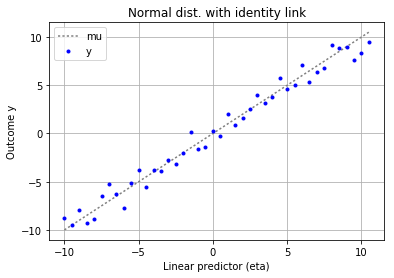

In [14]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)

# Expected value
mu = eta

# Outcome
y = np.random.normal(loc=mu, scale=1)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Normal dist. with identity link")
ax.legend()
ax.grid(b=True)
#ax.set_aspect('equal')

plt.show()

# Exponential distribution with negative-inverse link

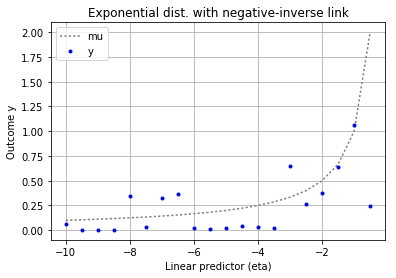

In [15]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)
eta = eta[eta < 0]               # Expected value mu > 0

# Expected value
mu = - 1 / eta

# Parameters
beta = mu                        # beta = 1 / lambda

# Outcome
y = np.random.exponential(scale=beta, size=None)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Exponential dist. with negative-inverse link")
ax.legend()
ax.grid(b=True)

plt.show()

# Gamma distribution with negative-inverse link

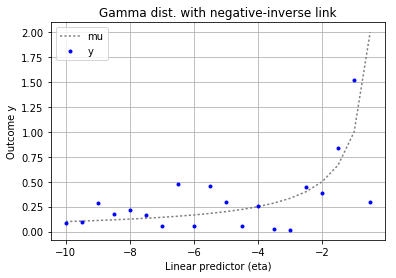

In [16]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)
eta = eta[eta < 0]               # Expected value mu > 0

# Expected value
mu = - 1 / eta

# Parameters
k = 2                      # Shape parameter
theta = mu / k               # Scale parameter > 0

# Outcome
y = np.random.gamma(shape=k, scale=theta)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Gamma dist. with negative-inverse link")
ax.legend()
ax.grid(b=True)

plt.show()

## Inverse Gaussian distribution with inverse-squared link

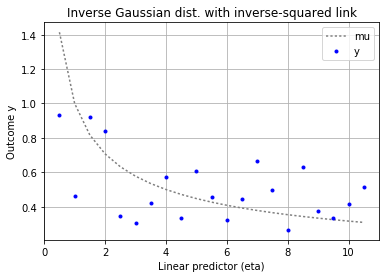

In [17]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)
eta = eta[eta > 0]

# Expected value
mu = 1 / np.sqrt(eta)

# Parameters
llambda = 2

# Outcome
y = np.random.wald(mean=mu, scale=llambda)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Inverse Gaussian dist. with inverse-squared link")
ax.legend()
ax.grid(b=True)

plt.show()

##  Poisson distribution with logarithmic link

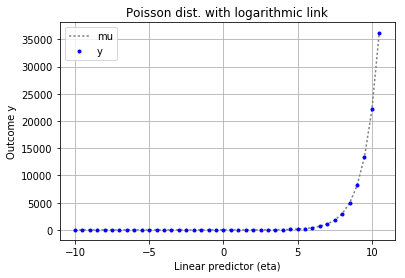

In [18]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)

# Expected value through logarithmic link
mu = np.exp(eta)

# Parameters
llambda = mu

# Outcome
y = np.random.poisson(lam=llambda)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Poisson dist. with logarithmic link")
ax.legend()
ax.grid(b=True)

plt.show()

## Bernoulli distribution with logit link

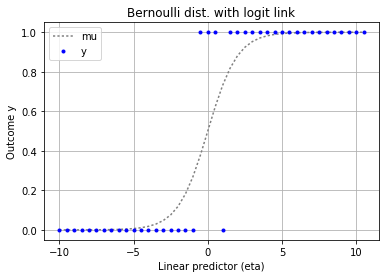

In [19]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)

# Probability through logit link
mu = 1 / (1 + np.exp(-eta))

# Parameters
n = 1      # defines Bernoulli as special case of binomial dist.
p = mu

# Outcome
y = np.random.binomial(n, p)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Bernoulli dist. with logit link")
ax.legend()
ax.grid(b=True)

plt.show()

## Binomial distribution with logit link

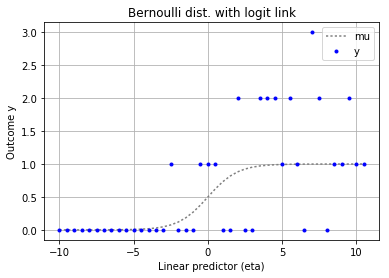

In [20]:
# Linear predictor
eta = np.arange(-10, 11, 0.5)

# Expected value through logit link
mu = 1 / (1 + np.exp(-eta))      # E(y) = n * p

# Parameters
n = 3
p = mu / n

# Outcome
y = np.random.binomial(n, p)

# Plot
fig, ax = plt.subplots(1, 1)

_ = ax.plot(eta, mu, marker="", ls=":", c='grey', label='mu')
_ = ax.plot(eta, y, marker='.', mec="blue", mfc="blue", ls="None", label="y")
ax.set_xlabel("Linear predictor (eta)")
ax.set_ylabel("Outcome y")
ax.set_title("Bernoulli dist. with logit link")
ax.legend()
ax.grid(b=True)

plt.show()

## Categorical distribution with logit link

In [21]:
# Linear predictor (array)
k = 3
x = np.arange(-10, 11, 1)
y = np.repeat(x, k)
eta = np.reshape(y, (len(x), k))
for i in np.arange(1, k):
    np.random.shuffle(eta[:, i])

# Expected value through logit link
mu = 1 / (1 + np.exp(-eta))

# Probability array
sum_mu = np.sum(mu, axis=1)
sum_mu = np.reshape(sum_mu, (len(x), 1))
p = mu / sum_mu

# Parameters
n = 1             # by definition

# Outcome
y = np.zeros(k * len(x))
y = np.reshape(y, (len(x), k))
for i in np.arange(0, len(x)):
    y[i] = np.random.multinomial(n, p[i, :])
    
print(y)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


## Multinomial distribution with logit link

In [22]:
# Linear predictor (array)
k = 3
x = np.arange(-10, 11, 1)
y = np.repeat(x, k)
eta = np.reshape(y, (len(x), k))
for i in np.arange(1, k):
    np.random.shuffle(eta[:, i])

# Expected value through logit link
mu = 1 / (1 + np.exp(-eta))

# Probability array
sum_mu = np.sum(mu, axis=1)
sum_mu = np.reshape(sum_mu, (len(x), 1))
p = mu / sum_mu

# Parameters
n = 3           # n > 1 by definition

# Outcome
y = np.zeros(k * len(x))
y = np.reshape(y, (len(x), k))
for i in np.arange(0, len(x)):
    y[i] = np.random.multinomial(n, p[i, :])
    
print(y)

[[0. 3. 0.]
 [0. 3. 0.]
 [0. 1. 2.]
 [0. 1. 2.]
 [0. 3. 0.]
 [0. 3. 0.]
 [0. 1. 2.]
 [0. 0. 3.]
 [2. 0. 1.]
 [0. 0. 3.]
 [1. 0. 2.]
 [1. 2. 0.]
 [2. 1. 0.]
 [2. 1. 0.]
 [3. 0. 0.]
 [2. 0. 1.]
 [0. 2. 1.]
 [2. 1. 0.]
 [3. 0. 0.]
 [3. 0. 0.]
 [0. 0. 3.]]
